In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [15]:
X , _ = make_blobs(n_samples=100, 
                   centers=1, 
                   cluster_std=2, 
                   random_state=42)

In [16]:
def divisive_clustering(data, 
                        max_clusters = 4):
    clusters = [data]   ## start with one big cluster 
    labels = np.zeros(len(data),dtype=int)
    while len(clusters) < max_clusters:
        #find the cluster with the largest number of points
        idx_to_split = np.argmax([len(c) for c in clusters])
        #this is the cluster we want to split next 
        cluster_to_split = clusters.pop(idx_to_split)
        #get a new label to assign to the newly formed cluster 
        current_label = np.max(labels) + 1
        ##kmeans to split the cluster 
        kmeans = KMeans(n_clusters=2,random_state=42)
        split_labels = kmeans.fit_predict(cluster_to_split)
        ##divides the cluster into two based on kmeans data 
        cluster1 = cluster_to_split[split_labels == 0]
        cluster2 = cluster_to_split[split_labels == 1]
        #add the new clusters back into the list 
        clusters.append(cluster1)
        clusters.append(cluster2)
        ##update label assignments 
        label_indices = np.where([np.any(np.all(x == cluster_to_split,
                                         axis = 1 )) for x in data])[0]
        label_subset = split_labels
        labels[label_indices] = current_label
        labels[label_indices[label_subset == 0]] = current_label 
        labels[label_indices[label_subset == 1]] = current_label + 1
        
    return labels

In [17]:
cluster_labels = divisive_clustering(X,
                                     max_clusters=4)

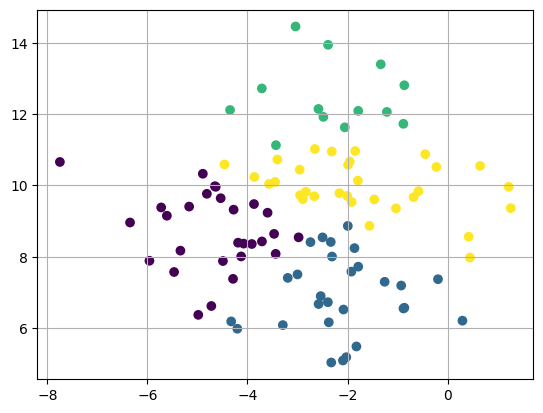

In [18]:
plt.Figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],c=cluster_labels)
plt.grid(True)
plt.show()